In [2]:
viirsURL = 'http://coastwatch.pfeg.noaa.gov/erddap/griddap/erdVHsstaWS3day.mat?sst[(last):1:(last)][(0.0):1:(0.0)][(41.):1:(31.)][(-128.):1:(-115.)]';
F=websave('viirs.mat',viirsURL);
extract = load(F);
extract = extract.erdVHsstaWS3day;

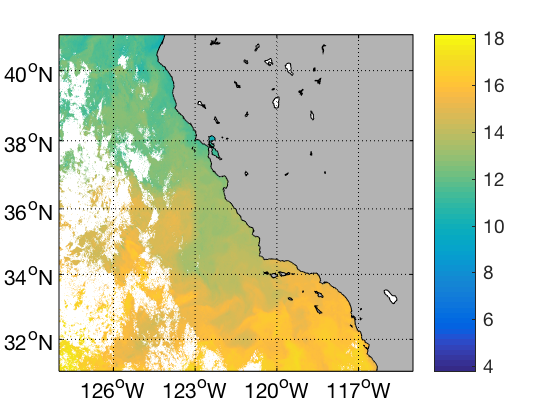

In [3]:
latitude=double(extract.latitude);
longitude=double(extract.longitude);
sst = double(squeeze(extract.sst));
[Plg,Plt]=meshgrid(longitude,latitude);
lat=[min(latitude) max(latitude)];
lon=[min(longitude) max(longitude)];
m_proj('mercator','lon',lon, 'lat', lat);
m_pcolor(Plg,Plt,sst);
shading flat;
m_grid;
m_gshhs_h('patch',[.7 .7 .7]);
colorbar;


In [1]:
ndbcURL = 'http://coastwatch.pfeg.noaa.gov/erddap/tabledap/cwwcNDBCMet.mat?time,wspd&station="46012"&time>=2012-01-01&time<=2013-01-01';
F=websave('ndbc.mat',ndbcURL);
extract = load(F);
extract = extract.cwwcNDBCMet;

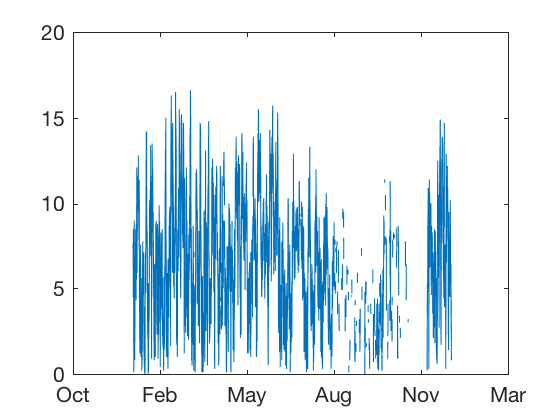

In [2]:
dateBase= datenum('1970-01-01-00:00:00');
secsDay = 86400;
times = (extract.time/secsDay)+dateBase;
plot(times, extract.wspd)
datetick('x','mmm', 'keepticks')